In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("flight.csv")

In [3]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


Unique departure times: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


C:\Users\admin\AppData\Local\Temp\ipykernel_4204\2379623369.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=departure_counts.index, y=departure_counts.values, palette='viridis')


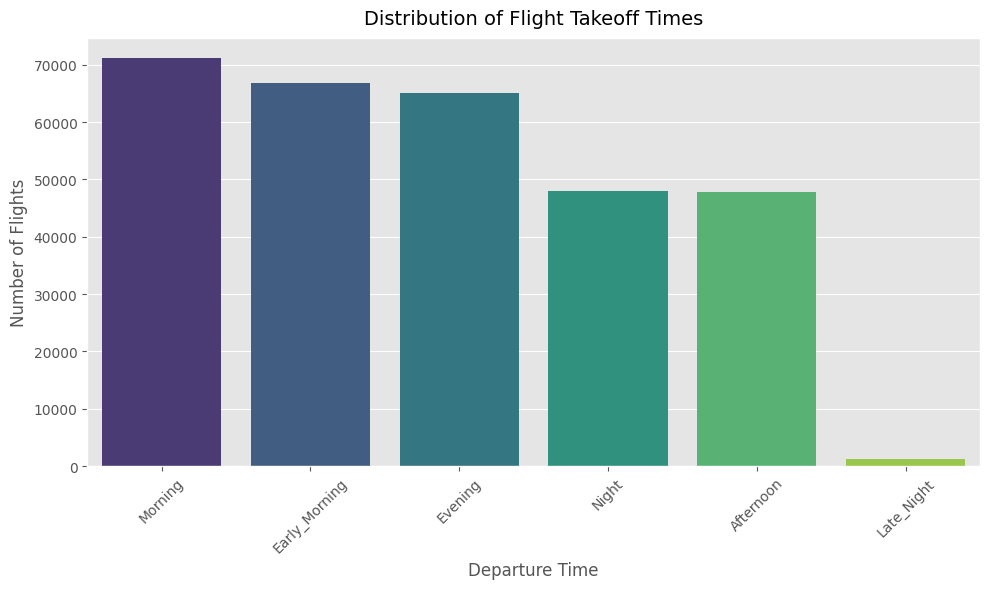


Flight Takeoff Time Frequencies:
departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64


In [4]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style to 'ggplot' as per the notebook
plt.style.use('ggplot')

# Load the dataset
df = pd.read_csv("flight.csv")

# Check unique values in departure_time to confirm categories
print("Unique departure times:", df['departure_time'].unique())

# Count the frequency of each departure time category
departure_counts = df['departure_time'].value_counts()

# Create a bar plot to visualize the distribution of departure times
plt.figure(figsize=(10, 6))  # Set figure size for better readability
sns.barplot(x=departure_counts.index, y=departure_counts.values, palette='viridis')

# Customize the plot
plt.title('Distribution of Flight Takeoff Times', fontsize=14, pad=10)
plt.xlabel('Departure Time', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent label cutoff

# Display the plot
plt.show()

# Print the frequency counts for reference
print("\nFlight Takeoff Time Frequencies:")
print(departure_counts)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   duration  300153 non-null  float64
 1   price     300153 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 4.6 MB
None

Pearson Correlation between Duration and Price: 0.2042


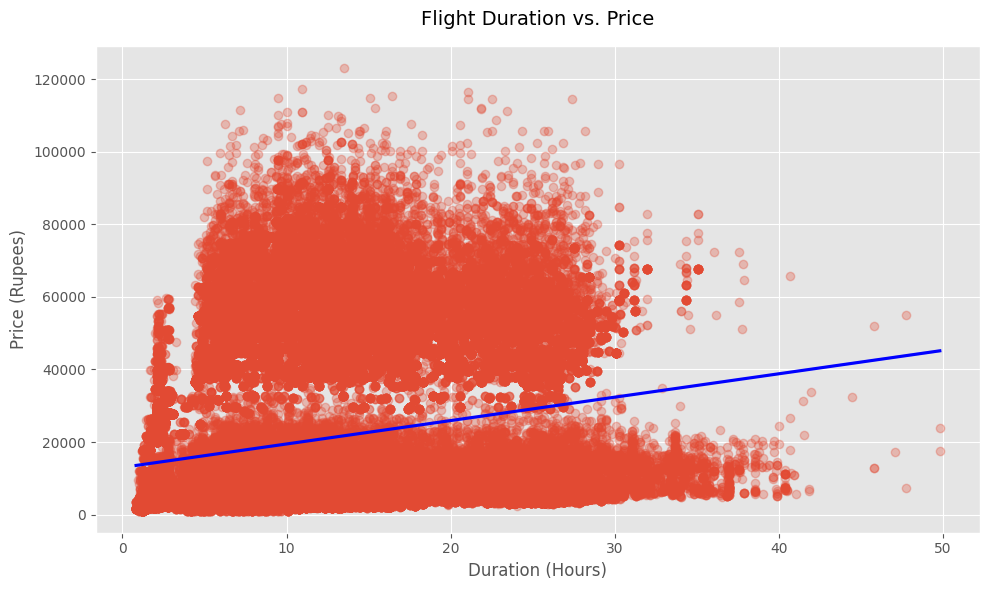


Mean Price by Duration Bins:
duration
(0.781, 5.73]     10553.562290
(5.73, 10.63]     18629.500357
(10.63, 15.53]    25498.999871
(15.53, 20.43]    27313.214230
(20.43, 25.33]    26351.594340
(25.33, 30.23]    22980.862524
(30.23, 35.13]    18086.181765
(35.13, 40.03]    11921.726519
(40.03, 44.93]    12920.850000
(44.93, 49.83]    24848.625000
Name: price, dtype: float64


C:\Users\admin\AppData\Local\Temp\ipykernel_4204\1978760161.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_by_duration = df.groupby(duration_bins)['price'].mean()


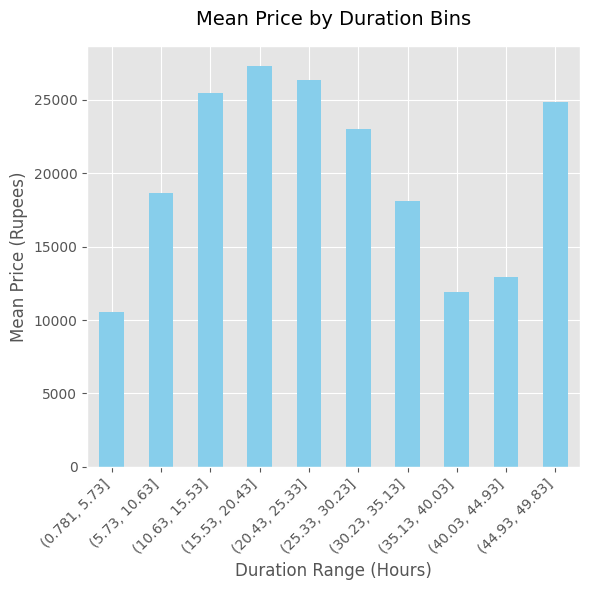

In [9]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the plot style to 'ggplot' as per the notebook
plt.style.use('ggplot')

# Load the dataset
df = pd.read_csv("flight.csv")

# Verify the presence of duration and price columns
print("Dataset Info:")
print(df[['duration', 'price']].info())

# Calculate Pearson correlation between duration and price
correlation = df['duration'].corr(df['price'])
print(f"\nPearson Correlation between Duration and Price: {correlation:.4f}")

# Create a scatter plot with regression line to visualize the relationship
plt.figure(figsize=(10, 6))  # Set figure size
sns.regplot(x='duration', y='price', data=df, scatter_kws={'alpha':0.3}, line_kws={'color':'blue'})

# Customize the plot
plt.title('Flight Duration vs. Price', fontsize=14, pad=15)
plt.xlabel('Duration (Hours)', fontsize=12)
plt.ylabel('Price (Rupees)', fontsize=12)
plt.tight_layout()

# Display the plot
plt.show()

# Optional: Group durations into bins and calculate mean price per bin
duration_bins = pd.cut(df['duration'], bins=10)  # Create 10 equal-width bins
mean_price_by_duration = df.groupby(duration_bins)['price'].mean()

# Print mean prices by duration bins
print("\nMean Price by Duration Bins:")
print(mean_price_by_duration)

# Visualize mean price by duration bins
plt.figure(figsize=(6, 6))
mean_price_by_duration.plot(kind='bar', color='skyblue')
plt.title('Mean Price by Duration Bins', fontsize=14, pad=15)
plt.xlabel('Duration Range (Hours)', fontsize=12)
plt.ylabel('Mean Price (Rupees)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [4]:
df.shape

(300153, 12)

Unique Stops: ['zero' 'one' 'two_or_more']


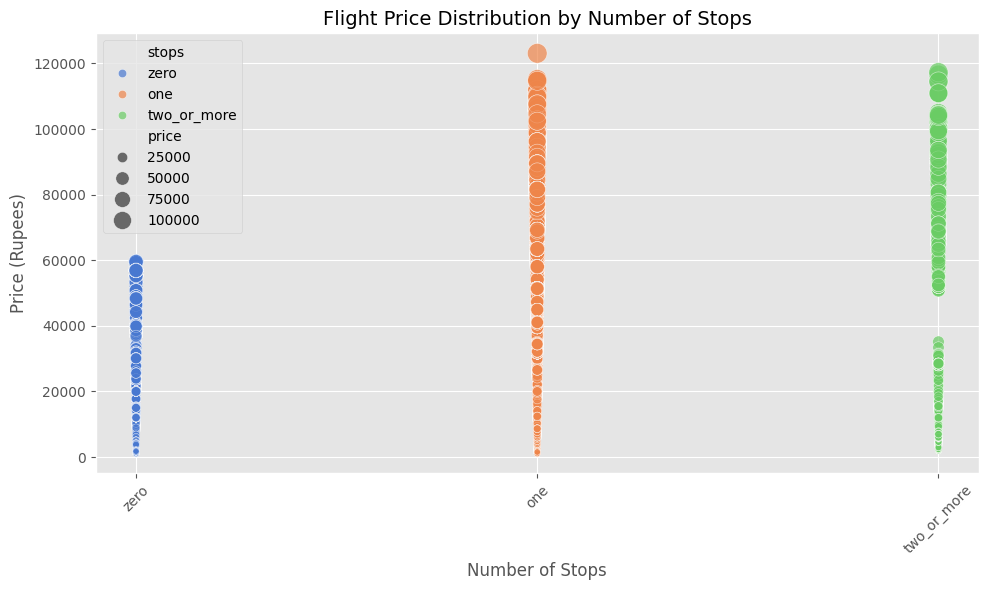


Mean Price by Stops:
stops
zero            9375.938535
two_or_more    14113.450775
one            22900.992482
Name: price, dtype: float64


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

df = pd.read_csv("flight.csv")

print("Unique Stops:", df['stops'].unique())

plt.figure(figsize=(10, 6))
sns.scatterplot(x='stops', y='price', data=df, 
                hue='stops', palette='muted', 
                size='price', sizes=(20, 200), 
                alpha=0.7)

plt.title('Flight Price Distribution by Number of Stops', fontsize=14)
plt.xlabel('Number of Stops', fontsize=12)
plt.ylabel('Price (Rupees)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

print("\nMean Price by Stops:")
print(df.groupby('stops')['price'].mean().sort_values())

In [5]:
df.drop(['Unnamed: 0','flight','duration'],axis = 1, inplace = True)

In [6]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  object
 1   source_city       300153 non-null  object
 2   departure_time    300153 non-null  object
 3   stops             300153 non-null  object
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  object
 6   class             300153 non-null  object
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 20.6+ MB


In [8]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

<Axes: xlabel='airline'>

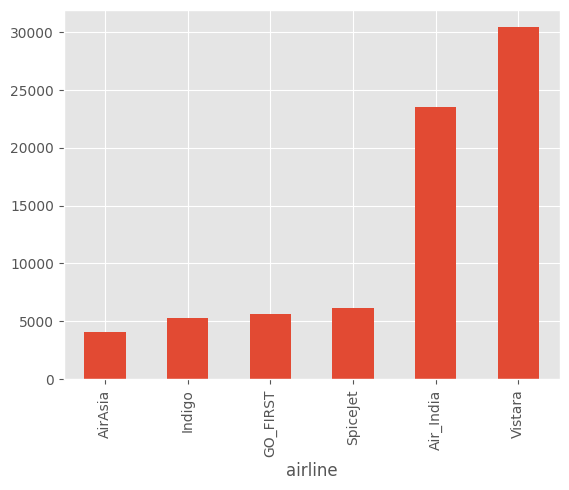

In [10]:
df.groupby('airline')['price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='airline'>

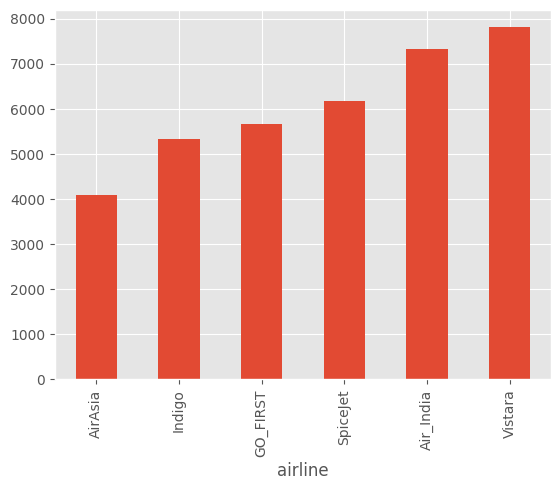

In [11]:
df[df['class'] == 'Economy'].groupby('airline')['price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='airline'>

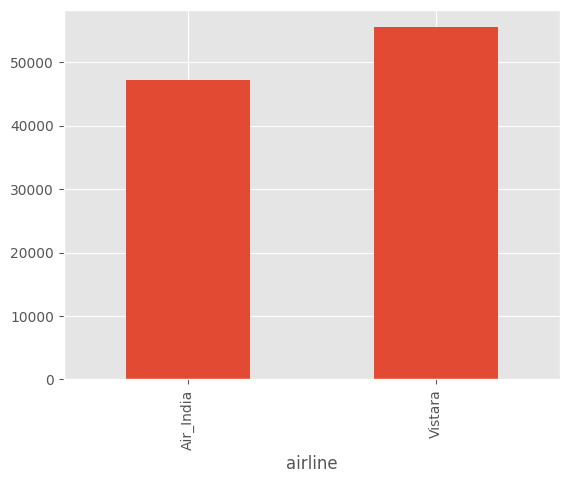

In [12]:
df[df['class'] == 'Business'].groupby('airline')['price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='airline'>

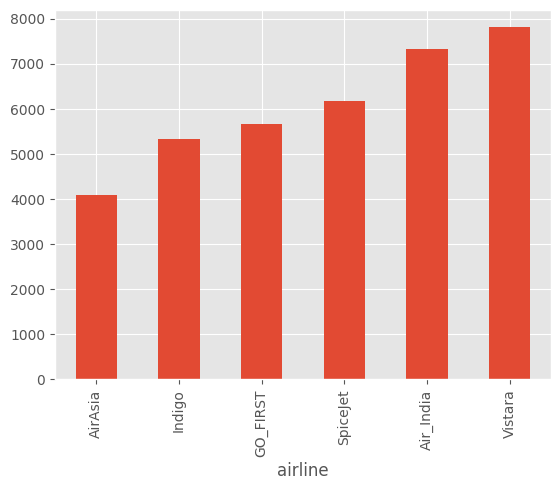

In [13]:
df[df['class'] == 'Economy'].groupby('airline')['price'].mean().sort_values().plot(kind='bar')

In [14]:
df['airline'] = df['airline'].map({'AirAsia':0,'Indigo':1,'GO_FIRST':2,'SpiceJet':3,'Air_India':4,'Vistara':5})

In [15]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,Delhi,Evening,zero,Night,Mumbai,Economy,1,5953
1,3,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,0,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,5,Delhi,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,5,Delhi,Morning,zero,Morning,Mumbai,Economy,1,5955


In [16]:
df['source_city'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai'],
      dtype=object)

<Axes: xlabel='source_city'>

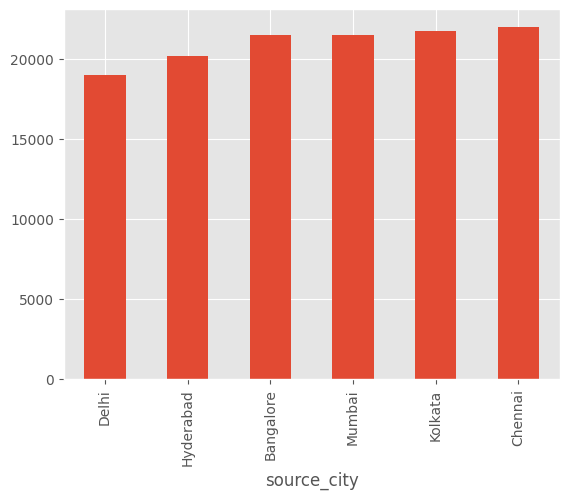

In [17]:
df.groupby('source_city')['price'].mean().sort_values().plot(kind='bar')

In [18]:
df['source_city'] = df['source_city'].map({'Delhi':0,'Hyderabad':1,'Bangalore':2,'Mumbai':3,'Kolkata':4,'Chennai':5})

In [19]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,Evening,zero,Night,Mumbai,Economy,1,5953
1,3,0,Early_Morning,zero,Morning,Mumbai,Economy,1,5953
2,0,0,Early_Morning,zero,Early_Morning,Mumbai,Economy,1,5956
3,5,0,Morning,zero,Afternoon,Mumbai,Economy,1,5955
4,5,0,Morning,zero,Morning,Mumbai,Economy,1,5955


<Axes: xlabel='destination_city'>

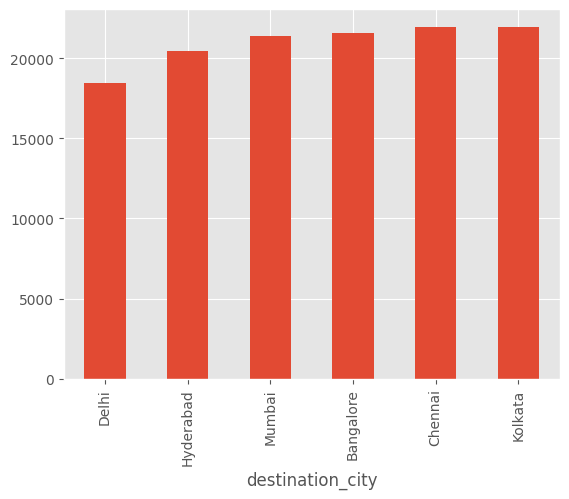

In [20]:
df.groupby('destination_city')['price'].mean().sort_values().plot(kind='bar')

In [21]:
df['destination_city'].unique()

array(['Mumbai', 'Bangalore', 'Kolkata', 'Hyderabad', 'Chennai', 'Delhi'],
      dtype=object)

In [22]:
df['destination_city'] = df['destination_city'].map({'Delhi':0,'Hyderabad':1,'Bangalore':2,'Mumbai':3,'Kolkata':4,'Chennai':5})

In [23]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,Evening,zero,Night,3,Economy,1,5953
1,3,0,Early_Morning,zero,Morning,3,Economy,1,5953
2,0,0,Early_Morning,zero,Early_Morning,3,Economy,1,5956
3,5,0,Morning,zero,Afternoon,3,Economy,1,5955
4,5,0,Morning,zero,Morning,3,Economy,1,5955


In [24]:
df['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [25]:
df['departure_time'] = df['departure_time'].map({'Early_Morning':0,'Morning': 1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5})

In [26]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,zero,Night,3,Economy,1,5953
1,3,0,0,zero,Morning,3,Economy,1,5953
2,0,0,0,zero,Early_Morning,3,Economy,1,5956
3,5,0,1,zero,Afternoon,3,Economy,1,5955
4,5,0,1,zero,Morning,3,Economy,1,5955


In [27]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [28]:
df['stops'] = df['stops'].map({'zero':0,'one':1,'two_or_more':2})

In [29]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,0,Night,3,Economy,1,5953
1,3,0,0,0,Morning,3,Economy,1,5953
2,0,0,0,0,Early_Morning,3,Economy,1,5956
3,5,0,1,0,Afternoon,3,Economy,1,5955
4,5,0,1,0,Morning,3,Economy,1,5955


In [36]:
df['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [30]:
df['class']= df['class'].map({'Economy':0,'Business':1})

In [31]:
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,3,0,3,0,Night,3,0,1,5953
1,3,0,0,0,Morning,3,0,1,5953
2,0,0,0,0,Early_Morning,3,0,1,5956
3,5,0,1,0,Afternoon,3,0,1,5955
4,5,0,1,0,Morning,3,0,1,5955


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   airline           300153 non-null  int64 
 1   source_city       300153 non-null  int64 
 2   departure_time    300153 non-null  int64 
 3   stops             300153 non-null  int64 
 4   arrival_time      300153 non-null  object
 5   destination_city  300153 non-null  int64 
 6   class             300153 non-null  int64 
 7   days_left         300153 non-null  int64 
 8   price             300153 non-null  int64 
dtypes: int64(8), object(1)
memory usage: 20.6+ MB


In [33]:
df.isnull().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
days_left           0
price               0
dtype: int64

In [34]:
df['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [35]:
df['arrival_time'] = df['arrival_time'].map({'Early_Morning':0,'Morning': 1,'Afternoon':2,'Evening':3,'Night':4,'Late_Night':5})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   airline           300153 non-null  int64
 1   source_city       300153 non-null  int64
 2   departure_time    300153 non-null  int64
 3   stops             300153 non-null  int64
 4   arrival_time      300153 non-null  int64
 5   destination_city  300153 non-null  int64
 6   class             300153 non-null  int64
 7   days_left         300153 non-null  int64
 8   price             300153 non-null  int64
dtypes: int64(9)
memory usage: 20.6 MB


In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x= df.drop(['price'],axis = 1)
y= df['price']

In [39]:
x.shape

(300153, 8)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [43]:
lr.score(x_test, y_test)

0.9040146643037914

In [44]:
from sklearn.metrics import mean_absolute_error

In [45]:
y_pred = lr.predict(x_test)

In [46]:
mean_absolute_error(y_test,y_pred)

4508.996747930485

In [47]:
import pickle

In [48]:
pickle.dump(lr,open('model.pkl','wb'))

In [49]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model
gb = GradientBoostingRegressor(random_state=42)
gb.fit(x_train, y_train)

# Predictions
y_pred_gb = gb.predict(x_test)

# MAE
mean_absolute_error(y_test, y_pred_gb)


2999.181268404601

In [50]:
print(gb.score(x_test, y_test))  # returns R²

0.9496548928706969


In [53]:
import numpy as np
print(np.sqrt(mean_squared_error(y_test, y_pred_gb)))  # RMSE

5094.311561544074


In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Model
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

# Predictions
y_pred_rf = rf.predict(x_test)

# MAE
mean_absolute_error(y_test, y_pred_rf)


2169.2956848497683

In [55]:
print(rf.score(x_test, y_test))  # returns R²)

0.9619785909695167


In [56]:
print(
np.sqrt(mean_squared_error(y_test, y_pred_rf)))  #RMSE Score

4427.116710831734


In [63]:
# best model
import pickle; pickle.dump(rf, open('random_forest_model.pkl', 'wb'))


In [62]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
import numpy as np

# Scale features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train LinearSVR model
svr = LinearSVR(random_state=42, max_iter=10000)
svr.fit(x_train_scaled, y_train)

# Predict
y_pred_svr = svr.predict(x_test_scaled)

# Evaluate
mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2 = r2_score(y_test, y_pred_svr)

print("MAE (LinearSVR):", mae)
print("RMSE (LinearSVR):", rmse)
print("R² Score (LinearSVR):", r2)

# Save model
pickle.dump(svr, open('linear_svr_model.pkl', 'wb'))



MAE (LinearSVR): 4294.90225882955
RMSE (LinearSVR): 7309.546762404339
R² Score (LinearSVR): 0.8963505117220347


In [ ]:
# React JS  + Tailwind CSS
# Flask